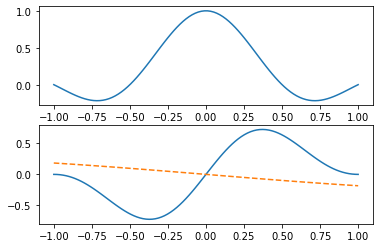

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
sin,cos,pi,sqrt = [np.sin,np.cos,np.pi,np.sqrt]
def f_transform(fun,f,lim = None):
    operator_e = lambda f,t:cos(2*pi*f*t)
    operator_o = lambda f,t:sin(2*pi*f*t)
    #operator_e = lambda f,t:np.exp(-1j*2*pi*f*t)
    #calc = list(map(lambda s:integrate.quad(lambda t:fun(t)*\
    #                       operator(s,t),0,np.inf)[0],s))
    if lim == None:
        even = integrate.quad(lambda t:fun(t)*operator_e(f,t),-np.inf,np.inf)[0]
        odd = integrate.quad(lambda t:fun(t)*operator_o(f,t),-np.inf,np.inf)[0]
    else:
        even = integrate.quad(lambda t:fun(t)*operator_e(f,t),lim[0],lim[1])[0]
        odd = integrate.quad(lambda t:fun(t)*operator_o(f,t),lim[0],lim[1])[0]
        
    return even + 1j*odd
test_f1 = lambda t: 1 if(abs(t)<1) else 0
#test_f1 = lambda t: np.exp(-t) if t > 0 else 0
test_f2 = lambda t: np.exp(t) if abs(t)<2 else 0

t = np.linspace(-1,1,100)
test = np.array([fourier(test_f1,i,lim = [0,1]) for i in t])
k = 1
a = 1
analytical1 = lambda f: k*(1 - np.exp(-1j*a*f))/(1j*f*sqrt(2*pi))
fig,ax = plt.subplots(2,1)
ax[0].plot(t,test.real)
ax[1].plot(t,test.imag)
ax[1].plot(t,np.array(list(map(analytical1,t))).imag,linestyle = '--')
